In [137]:
import numpy as np
import random as rd
from math import inf,sqrt,pi

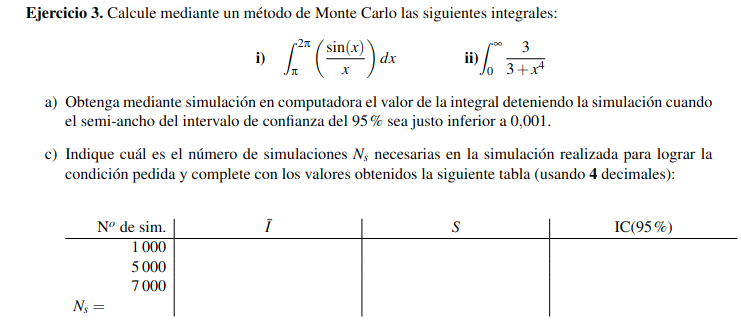

El ancho del intervalo es $2z_{\sigma/2}\frac{S(n)}{\sqrt{n}}$ por lo que el semi-ancho es $z_{\sigma/2}\frac{S(n)}{\sqrt{n}}$. Por lo que en el algoritmo en vez de comparar $\sqrt{S^2/n} \gt d$ con $d = L / 2*z_{\sigma/2}$. Voy a comparar $\sqrt{S^2/n} \gt L/z_{\sigma/2}$

Queremos que la confianza sea del 95% $\rightarrow \alpha = 0.05$ y $z_{\alpha/2} = 1.96$, y el L sera 0.001

In [138]:
def f_i(x):
    return np.sin(x)/x
    
def f_ii(x):
    return 3/(3+(x**4))

In [139]:
def montecarlo_a_b(fun, a, b, z_alfa_2, L, max_it):
    d = L / z_alfa_2
    n = 1
    mean = fun(a + (b-a)*rd.random()) * (b-a)
    Scuad = 0 # varianza

    while n < max_it and (n <= 100 or sqrt(Scuad/n) > d): # chequeo la desviaicon estandar de la media 
                                            # (varianza del estimador)
        n+=1
        x = fun(a + (b-a)*rd.random()) * (b-a)
        old_mean = mean
        mean = old_mean + (x - old_mean) / n
        Scuad = (1 - 1/(n-1)) * Scuad + n*(mean - old_mean)**2

    ancho = 2*z_alfa_2*sqrt(Scuad/n)
    return n, round(mean,4), round(Scuad**0.5,4), round(ancho,4)

In [144]:
print("Nsims | Estimacion | Desviacion | IC")
print(montecarlo_a_b(f_i, pi, 2*pi, 1.96, 0.001, 1000))
print(montecarlo_a_b(f_i, pi, 2*pi, 1.96, 0.001, 5000))
print(montecarlo_a_b(f_i, pi, 2*pi, 1.96, 0.001, 7000))
print(montecarlo_a_b(f_i, pi, 2*pi, 1.96, 0.001, inf))

Nsims | Estimacion | Desviacion | IC
(1000, -0.4345, 0.2097, 0.026)
(5000, -0.4303, 0.211, 0.0117)
(7000, -0.4416, 0.2089, 0.0098)
(170198, -0.434, 0.2105, 0.002)


In [141]:
def montecarlo_0_inf(fun, z_alfa_2, L, max_it):
    d = L / z_alfa_2
    n = 1
    y = rd.random()
    mean = fun((1/y) - 1) / (y**2)
    Scuad = 0
    semiancho = 0
    while n<max_it and (n<=100 or sqrt(Scuad/n)> d): # desviacion estandar de la media muestral
        n+=1

        y = rd.random()
        x = fun((1/y) - 1) / (y**2)

        old_mean = mean
        mean = old_mean + ((x - old_mean) / n)
        
        Scuad = (1 - 1/(n-1))*Scuad + n*((mean - old_mean)**2)

    ancho = 2*z_alfa_2*sqrt(Scuad/n)
    return n, round(mean,4), round(Scuad**0.5,4), round(ancho,4) # valores genrados, media muestral, varianza muestral

In [142]:
print("Nsims | Estimacion | Desviacion | IC")
print(montecarlo_0_inf(f_ii, 1.96, 0.001, 1000))
print(montecarlo_0_inf(f_ii, 1.96, 0.001, 5000))
print(montecarlo_0_inf(f_ii, 1.96, 0.001, 7000))
print(montecarlo_0_inf(f_ii, 1.96, 0.001, inf))

Nsims | Estimacion | Desviacion | IC
(1000, 1.478, 1.0028, 0.1243)
(5000, 1.4639, 0.9857, 0.0546)
(7000, 1.4535, 0.9806, 0.0459)
(3660487, 1.4617, 0.9761, 0.002)
